# 미래 예측 feature로 2021~2035 가스수요 예측하기
---

In [728]:
# 모듈 로딩
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl

mpl.rc('font',family='Malgun Gothic')

In [729]:
# 모델 학습할 데이터
train_feature = pd.read_csv('./data_tomato.csv')
train_target = pd.read_csv('./target.csv')
train_feature

,DATE,TCL_AT,TCL_LT,TCL_HT,TEMP_EF_CAP,TEMP_EF_DONGNAM,TEMP_EF_DAEGYUNG,TEMP_EF_CHOONG,TEMP_EF_HONAM,TEMP_EF_MEAN,...,ELEC_SERVICE,ELEC_CIVIL_SUM,ELEC_ARGRI_FISHING,ELEC_MINING,ELEC_MANUFACT,ELEC_INDSUM,RV,GAS_PRICE_IND,OIL_PRICE,QVA
0,1996-01-01,0.004764,-0.189311,0.240528,0.84711,5.91778,6.73765,3.33479,1.88651,3.744768,...,3616542,6988059,301811,80421,8854576,9236808,0.97,26.94,27.86,36550.300000
1,1996-02-01,0.007708,-0.226982,0.372691,0.81430,5.90875,6.73291,3.32638,1.87883,3.732234,...,3551611,6898533,327617,70471,8067220,8465308,0.93,26.94,29.04,36751.000000
2,1996-03-01,0.137972,-0.045631,0.367739,0.60731,5.81529,6.67634,3.22000,1.78740,3.621268,...,3333225,6416945,345359,81877,9250086,9677322,0.96,26.94,27.99,36951.700000
3,1996-04-01,0.261910,0.029456,0.582132,0.24132,5.71003,6.61264,3.07795,1.66054,3.460496,...,3430624,6615182,292235,84596,9274014,9650845,0.94,26.94,28.74,37152.400000
4,1996-05-01,0.428759,0.242892,0.688458,-0.38328,5.67433,6.58956,3.02586,1.62083,3.305460,...,3333483,6370027,302913,80963,9274169,9658045,0.92,26.94,29.18,37365.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2020-08-01,3.341732,3.072238,3.949415,-0.52038,5.55479,6.50341,2.91789,1.55535,3.202212,...,12968200,22252059,1432700,110871,20803586,22347157,0.86,72.93,84.71,122745.133333
296,2020-09-01,2.623888,2.040712,3.317034,-0.48046,5.62159,6.57738,2.98076,1.59811,3.259476,...,12489373,22125819,1535383,124192,21325400,22984975,0.80,65.24,81.26,123742.766667
297,2020-10-01,1.844505,1.092630,2.554311,-0.14824,5.67245,6.61732,3.06704,1.64228,3.370170,...,10438455,17725942,1164339,121749,20053280,21339368,0.76,59.16,78.13,124740.400000
298,2020-11-01,1.149119,0.389722,2.114493,0.23138,5.73286,6.65465,3.15240,1.70088,3.494434,...,10989999,18720765,1580276,156931,20689055,22426262,0.75,58.72,78.64,124740.400000


In [730]:
# 자체 예측한 feature
future_feature = pd.read_csv('./data_future.csv')
future_feature

,DATE,POWER_GAS,ELEC_IND_SUM,OIL_PRICE,QVA,TCL_LT,TEMP_EF,ELEC_SERVICE
0,2021-01-01,21004815,24009895,106.270957,122715.511387,-0.819359,3.720112,1.546123e+07
1,2021-02-01,19006411,22411095,106.452033,123791.588066,-0.488770,3.663880,1.485668e+07
2,2021-03-01,17216940,23047185,106.615613,123126.447539,0.108879,3.557796,1.291000e+07
3,2021-04-01,15290843,22640767,106.796638,123534.791822,0.929050,3.418933,1.228525e+07
4,2021-05-01,15763108,22310541,106.971887,123756.051487,1.691170,3.297840,1.092951e+07
...,...,...,...,...,...,...,...,...
175,2035-08-01,23623051,27327684,137.373064,144116.665066,3.940146,3.173664,1.651412e+07
176,2035-09-01,21558395,26481467,137.554127,145813.462779,2.922097,3.231943,1.524711e+07
177,2035-10-01,20954172,26795426,137.729350,145918.753203,1.620847,3.358512,1.358630e+07
178,2035-11-01,21861274,27345267,137.910414,146304.640846,0.430566,3.507064,1.477608e+07


In [731]:
train_target[['CIVIL','IND']]

,CIVIL,IND
0,605519,83809
1,566323,70427
2,477514,62652
3,337797,47050
4,184522,30709
...,...,...
295,398661,457970
296,380235,525619
297,616682,600890
298,1093747,665901


In [732]:
train_all =pd.concat([train_feature,train_target[['CIVIL','IND']]], axis =1)
train_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                300 non-null    object 
 1   TCL_AT              300 non-null    float64
 2   TCL_LT              300 non-null    float64
 3   TCL_HT              300 non-null    float64
 4   TEMP_EF_CAP         300 non-null    float64
 5   TEMP_EF_DONGNAM     300 non-null    float64
 6   TEMP_EF_DAEGYUNG    300 non-null    float64
 7   TEMP_EF_CHOONG      300 non-null    float64
 8   TEMP_EF_HONAM       300 non-null    float64
 9   TEMP_EF_MEAN        300 non-null    float64
 10  POWER_WATER         300 non-null    int64  
 11  POWER_FIRE          300 non-null    int64  
 12  POWER_NUCLEAR       300 non-null    int64  
 13  POWER_NAEYEON       300 non-null    int64  
 14  POWER_GROUP         300 non-null    int64  
 15  POWER_TRANS         300 non-null    int64  
 16  POWER_GA

In [733]:
# 1996~2020
train_all = train_all[['DATE','POWER_GAS','ELEC_INDSUM','OIL_PRICE','QVA','TCL_LT'	,'TEMP_EF_MEAN','ELEC_SERVICE', 'CIVIL','IND']]

# 1996~2020 feature
train_data = train_all.drop(['DATE','CIVIL','IND'], axis =1)

# 1996~2020 target
train_target = train_all[['CIVIL','IND']]
train_target_C = train_all['CIVIL']
train_target_I = train_all['IND']

# 2021~2035
test_data = future_feature.drop(['DATE'], axis =1)
test_data.columns = ['POWER_GAS','ELEC_INDSUM','OIL_PRICE','QVA','TCL_LT','TEMP_EF_MEAN','ELEC_SERVICE']
train_data ,test_data

(     POWER_GAS  ELEC_INDSUM  OIL_PRICE            QVA    TCL_LT  TEMP_EF_MEAN  \
 0      8408979      9236808      27.86   36550.300000 -0.189311      3.744768   
 1      7593086      8465308      29.04   36751.000000 -0.226982      3.732234   
 2      8306941      9677322      27.99   36951.700000 -0.045631      3.621268   
 3      8299351      9650845      28.74   37152.400000  0.029456      3.460496   
 4      8156027      9658045      29.18   37365.733333  0.242892      3.305460   
 ..         ...          ...        ...            ...       ...           ...   
 295   19959998     22347157      84.71  122745.133333  3.072238      3.202212   
 296   18228194     22984975      81.26  123742.766667  2.040712      3.259476   
 297   13625540     21339368      78.13  124740.400000  1.092630      3.370170   
 298   13868808     22426262      78.64  124740.400000  0.389722      3.494434   
 299   15511381     23742196      88.53  124740.400000 -0.719330      3.680386   
 
      ELEC_SER

In [734]:
train_target


,CIVIL,IND
0,605519,83809
1,566323,70427
2,477514,62652
3,337797,47050
4,184522,30709
...,...,...
295,398661,457970
296,380235,525619
297,616682,600890
298,1093747,665901


### 스케일링
---

In [735]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['POWER_GAS','ELEC_INDSUM','OIL_PRICE','QVA','TCL_LT','TEMP_EF_MEAN','ELEC_SERVICE']

# 스케일링
train_data_scaled = scaler.fit_transform(train_data[scale_cols])
test_data_scaled = scaler.fit_transform(test_data[scale_cols])
train_target_scaled = scaler.fit_transform(train_target)

# 데이터프레임으로 변환
train_data_scaled = pd.DataFrame(train_data_scaled)
test_data_scaled = pd.DataFrame(test_data_scaled)
train_target_scaled = pd.DataFrame(train_target_scaled)

# 데이터프레임 컬럼명 생성
train_data_scaled.columns = scale_cols
test_data_scaled.columns = scale_cols

train_target_scaled.columns = ['CIVIL','IND']
train_target_scaled_C = train_target_scaled['CIVIL']
train_target_scaled_I = train_target_scaled['IND']


# [ 최종형태 ]

#### 1996~2020 feature ####
# train_data_scaled.info()

#### 1996~2020 target ####
# train_target_scaled_C.info() 
# train_target_scaled_I.info()

#### 2021~2035 feature #### 
# test_data_scaled.info()


### Split dataset
---
- train, val, test

In [736]:
# train, val, test 범위 설정

TEST_SIZE = 60 # 테스트: 2015~2020(60개월) / 학습: 1996~2014(240개월)
WINDOW_SIZE = 12 # 학습시킬 과거 개월 단위(12개월)

# 학습 데이터 
x_train = train_data_scaled[:-TEST_SIZE] # 1996~2014
x_val = train_data_scaled[-TEST_SIZE:] # 2015~2020
x_test = test_data_scaled # 2021~2035(최종 목표)

# target 산업용
y_train_C = train_target_scaled_C[:-TEST_SIZE] # 1996~2014
y_val_C = train_target_scaled_C[-TEST_SIZE:] # 2015~2020
# target 민수용
y_train_I = train_target_scaled_I[:-TEST_SIZE] # 1996~2014
y_val_I = train_target_scaled_I[-TEST_SIZE:] # 2015~2020

In [737]:
print('[ 1996~2015 train/target 데이터 ]')
print(f'x_train.shape: {x_train.shape}, y_train_C.shape: {y_train_C.shape}, y_train_I.shape: {y_train_I.shape}') 
print()
print('[ 2016~2020 train/target 데이터 ]')
print(f'x_val.shape  : {x_val.shape},  y_train_C.shape: {y_val_C.shape}, y_train_I.shape: {y_val_I.shape}') 
print()
print('[ 2021~2035 train 데이터 ]')
print(f'x_test.shape : {x_test.shape}')
print() 

[ 1996~2015 train/target 데이터 ]
x_train.shape: (240, 7), y_train_C.shape: (240,), y_train_I.shape: (240,)

[ 2016~2020 train/target 데이터 ]
x_val.shape  : (60, 7),  y_train_C.shape: (60,), y_train_I.shape: (60,)

[ 2021~2035 train 데이터 ]
x_test.shape : (180, 7)



# 과거학습
---

In [738]:
# 과거 데이터 학습 함수(target 존재시)
def make_dataset1(data, label, window_size=12):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size): # 데이터 개월 개수 - 학습할 과거개월수 
        feature_list.append(np.array(data.iloc[i:i+window_size])) # 시작 개월 ~ 12개월
        label_list.append(np.array(label.iloc[i+window_size])) # 12개월 후 타겟 데이터
    return np.array(feature_list), np.array(label_list)

# 과거 데이터 학습 함수(target 존재하지 않을 시)
# test용
def make_dataset2(data, label, window_size=12):
    test_list = []
    for i in range(len(data) - window_size): # 데이터 개월 개수 - 학습할 과거개월수 
        test_list.append(np.array(data.iloc[i:i+window_size])) # 시작 개월 ~ 12개월 # 12개월 후 타겟 데이터
    return np.array(test_list)

In [739]:
# train, val, test 범위 설정

TEST_SIZE = 60 # 테스트: 2015~2020(60개월) / 학습: 1996~2014(240개월)
WINDOW_SIZE = 30 # 학습시킬 과거 개월 단위(12개월)

# 학습 데이터 
x_train = train_data_scaled[:-TEST_SIZE] # 1996~2014
x_val = train_data_scaled[-TEST_SIZE:] # 2015~2020
x_test = test_data_scaled # 2021~2035(최종 목표)

# target 민수용
y_train_C = train_target_scaled_C[:-TEST_SIZE] # 1996~2014
y_val_C = train_target_scaled_C[-TEST_SIZE:] # 2015~2020

In [740]:
# train, valid, test 과거학습 단위 생성

# 과거 12개월-> 다음 1개월 예측( 1996~2014년 )
# 민수용 
x_train, y_train_C = make_dataset1(x_train, y_train_C, WINDOW_SIZE)
x_val, y_val_C = make_dataset1(x_val, y_val_C, WINDOW_SIZE)

# test용 (2021~2035년)
x_test = make_dataset2(x_test, WINDOW_SIZE)

In [741]:
print('[ 1996~2015 train/target 데이터 ]')
print(f'x_train.shape: {x_train.shape}, y_train_C.shape: {y_train_C.shape}, y_train_I.shape: {y_train_I.shape}') 
print()
print('[ 2016~2020 train/target 데이터 ]')
print(f'x_val.shape  : {x_val.shape},  y_train_C.shape: {y_val_C.shape}, y_train_I.shape: {y_val_I.shape}') 
print()
print('[ 2021~2035 train 데이터 ]')
print(f'x_test.shape : {x_test.shape}')
print() 

[ 1996~2015 train/target 데이터 ]
x_train.shape: (210, 30, 7), y_train_C.shape: (210,), y_train_I.shape: (240,)

[ 2016~2020 train/target 데이터 ]
x_val.shape  : (30, 30, 7),  y_train_C.shape: (30,), y_train_I.shape: (60,)

[ 2021~2035 train 데이터 ]
x_test.shape : (168, 12, 7)



### 모형 학습
---
1. 민수용

In [742]:
# create LSTM model
from random import shuffle
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model_C = Sequential()
model_C.add(LSTM(17, 
                input_shape=(x_train.shape[1], x_train.shape[2]), 
                activation='tanh', 
                return_sequences=False)
            )
# model_C.add(LSTM(32))

model_C.add(Dense(1))

In [743]:
# LSTM model compile

model_C.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# import os
#model_path = 'model'
#filename = os.path.join(model_path, 'tmp_checkpoint.h5')
#checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model_C.fit(x_train, y_train_C, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_val, y_val_C))
                                    #callbacks=[early_stop])

Epoch 1/200
14/14 [==============================] - 2s 33ms/step - loss: 0.0625 - val_loss: 0.0708
Epoch 2/200
14/14 [==============================] - 0s 6ms/step - loss: 0.0563 - val_loss: 0.0673
Epoch 3/200
14/14 [==============================] - 0s 6ms/step - loss: 0.0544 - val_loss: 0.0681
Epoch 4/200
14/14 [==============================] - 0s 6ms/step - loss: 0.0499 - val_loss: 0.0619
Epoch 5/200
14/14 [==============================] - 0s 6ms/step - loss: 0.0482 - val_loss: 0.0630
Epoch 6/200
14/14 [==============================] - 0s 6ms/step - loss: 0.0474 - val_loss: 0.0588
Epoch 7/200
14/14 [==============================] - 0s 7ms/step - loss: 0.0434 - val_loss: 0.0593
Epoch 8/200
14/14 [==============================] - 0s 6ms/step - loss: 0.0415 - val_loss: 0.0551
Epoch 9/200
14/14 [==============================] - 0s 6ms/step - loss: 0.0394 - val_loss: 0.0525
Epoch 10/200
14/14 [==============================] - 0s 6ms/step - loss: 0.0368 - val_loss: 0.0518
Epoch 11

### 예측 및 시각화(val_data)
---

1. 민수용

In [744]:
# 예측
pred_C = model_C.predict(x_val)
pred_C.shape

1/1 [==============================] - 0s 340ms/step


(30, 1)

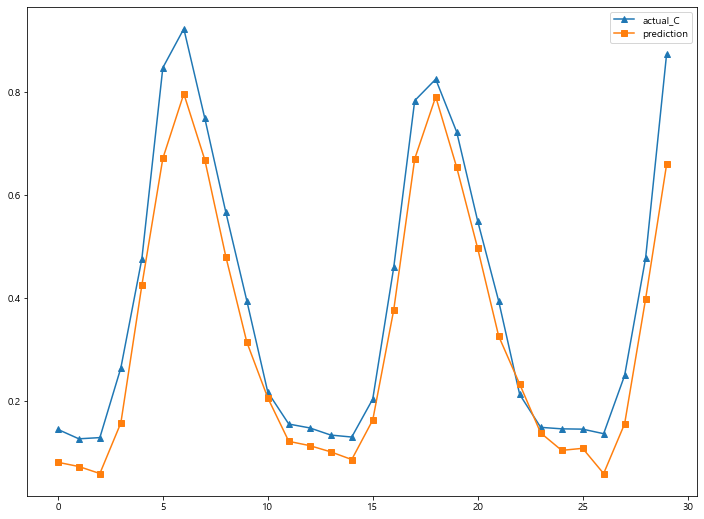

In [745]:
# 시각화
plt.figure(figsize=(12, 9))
#plt.plot(target_i, label = 'total_actual')
plt.plot(y_val_C,'^-', label = 'actual_C')
plt.plot(pred_C,'s-', label = 'prediction')
plt.legend()
plt.show()

### 모형 학습
---
2. 산업용

In [746]:
# train, val, test 범위 설정

TEST_SIZE = 60 # 테스트: 2015~2020(60개월) / 학습: 1996~2014(240개월)
WINDOW_SIZE = 30 # 학습시킬 과거 개월 단위(12개월)

# 학습 데이터 
x_train = train_data_scaled[:-TEST_SIZE] # 1996~2014
x_val = train_data_scaled[-TEST_SIZE:] # 2015~2020
x_test = test_data_scaled # 2021~2035(최종 목표)

# target 민수용
y_train_I = train_target_scaled_I[:-TEST_SIZE] # 1996~2014
y_val_I = train_target_scaled_I[-TEST_SIZE:] # 2015~2020

In [747]:
# train, valid, test 과거학습 단위 생성

# 과거 12개월-> 다음 1개월 예측( 1996~2014년 )

# 산업용
x_train, y_train_I = make_dataset1(x_train, y_train_I, WINDOW_SIZE)
x_val, y_val_I = make_dataset1(x_val, y_val_I, WINDOW_SIZE)

# test용 (2021~2035년)
x_test = make_dataset2(x_test, WINDOW_SIZE)

In [748]:
print('[ 1996~2015 train/target 데이터 ]')
print(f'x_train.shape: {x_train.shape}, y_train_C.shape: {y_train_C.shape}, y_train_I.shape: {y_train_I.shape}') 
print()
print('[ 2016~2020 train/target 데이터 ]')
print(f'x_val.shape  : {x_val.shape},  y_train_C.shape: {y_val_C.shape}, y_train_I.shape: {y_val_I.shape}') 
print()
print('[ 2021~2035 train 데이터 ]')
print(f'x_test.shape : {x_test.shape}')
print() 

[ 1996~2015 train/target 데이터 ]
x_train.shape: (210, 30, 7), y_train_C.shape: (210,), y_train_I.shape: (210,)

[ 2016~2020 train/target 데이터 ]
x_val.shape  : (30, 30, 7),  y_train_C.shape: (30,), y_train_I.shape: (30,)

[ 2021~2035 train 데이터 ]
x_test.shape : (168, 12, 7)



In [765]:
# create LSTM model
from random import shuffle
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(24, 
                input_shape=(x_train.shape[1], x_train.shape[2]), 
                activation='tanh', 
                return_sequences=False)
            )

model.add(Dense(1))

In [766]:
# LSTM model compile

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# import os
#model_path = 'model'
#filename = os.path.join(model_path, 'tmp_checkpoint.h5')
#checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train_I, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_val, y_val_I))
                                    #callbacks=[early_stop])

Epoch 1/200
14/14 [==============================] - 2s 34ms/step - loss: 0.0273 - val_loss: 0.0136
Epoch 2/200
14/14 [==============================] - 0s 7ms/step - loss: 0.0132 - val_loss: 0.0121
Epoch 3/200
14/14 [==============================] - 0s 7ms/step - loss: 0.0086 - val_loss: 0.0105
Epoch 4/200
14/14 [==============================] - 0s 7ms/step - loss: 0.0080 - val_loss: 0.0113
Epoch 5/200
14/14 [==============================] - 0s 7ms/step - loss: 0.0073 - val_loss: 0.0097
Epoch 6/200
14/14 [==============================] - 0s 7ms/step - loss: 0.0062 - val_loss: 0.0090
Epoch 7/200
14/14 [==============================] - 0s 7ms/step - loss: 0.0060 - val_loss: 0.0099
Epoch 8/200
14/14 [==============================] - 0s 7ms/step - loss: 0.0056 - val_loss: 0.0082
Epoch 9/200
14/14 [==============================] - 0s 7ms/step - loss: 0.0054 - val_loss: 0.0066
Epoch 10/200
14/14 [==============================] - 0s 7ms/step - loss: 0.0039 - val_loss: 0.0063
Epoch 11

### 예측 및 시각화(val_data)
---
- 산업용

In [767]:
pred_I = model.predict(x_val)
pred_I.shape

1/1 [==============================] - 0s 329ms/step


(30, 1)

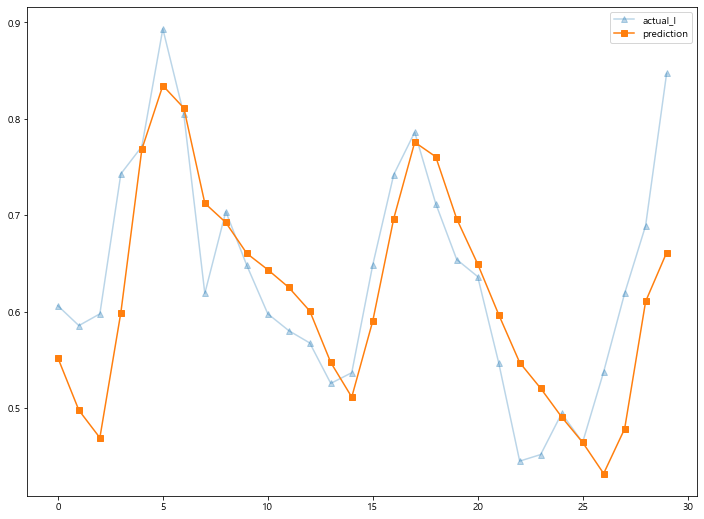

In [768]:
# 시각화
plt.figure(figsize=(12, 9))
#plt.plot(target_i, label = 'total_actual')
plt.plot(y_val_I,'^-', label = 'actual_I',alpha=0.3)
plt.plot(pred_I,'s-', label = 'prediction')
plt.legend()
plt.show()

In [753]:
pred_C, pred_I

(array([[0.08093283],
        [0.0727529 ],
        [0.05914739],
        [0.15734458],
        [0.42413908],
        [0.6703783 ],
        [0.7957786 ],
        [0.6675147 ],
        [0.48004553],
        [0.31409013],
        [0.20592612],
        [0.12157223],
        [0.11326197],
        [0.10120033],
        [0.08629059],
        [0.16294466],
        [0.37664482],
        [0.66962755],
        [0.7900163 ],
        [0.65293545],
        [0.49570474],
        [0.3256014 ],
        [0.23262684],
        [0.13793248],
        [0.10409376],
        [0.10803138],
        [0.05909058],
        [0.1556637 ],
        [0.3980239 ],
        [0.6587948 ]], dtype=float32),
 array([[0.5277413 ],
        [0.5064096 ],
        [0.5052582 ],
        [0.6047767 ],
        [0.73188347],
        [0.78031063],
        [0.7647554 ],
        [0.687672  ],
        [0.63388133],
        [0.6037391 ],
        [0.58301723],
        [0.5621144 ],
        [0.53522044],
        [0.5048648 ],
        [0.4994

In [754]:
b_axis

array([210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222,
       223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,
       236, 237, 238, 239])

In [755]:
a_axis


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

ValueError: cannot reshape array of size 30 into shape (168,)

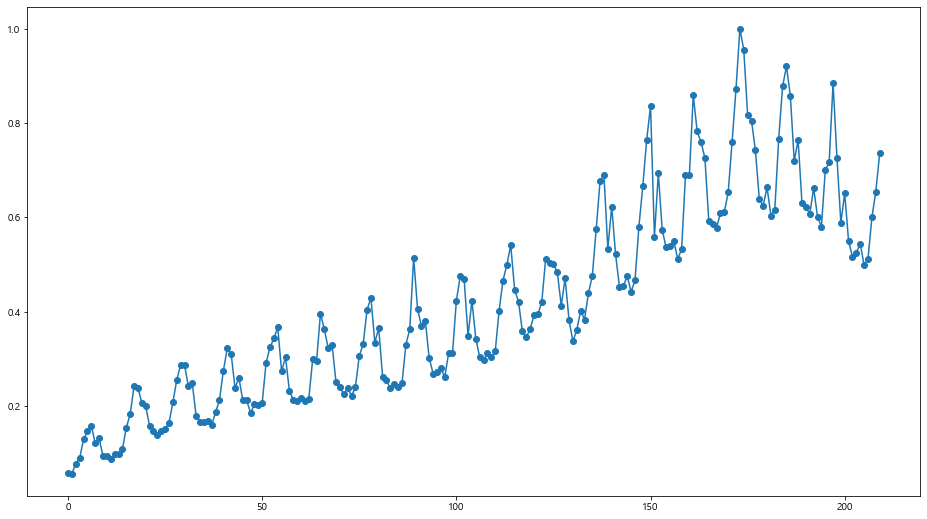

In [756]:
    # [ 예측 결과 시각화 ]
a_axis = np.arange(0, len(y_train_I))
b_axis = np.arange(len(y_train_I), len(y_train_I) + len(pred_I))

plt.figure(figsize=(16,9)) 
plt.plot(a_axis, y_train_I.reshape(x_train.shape[0],), 'o-') 
plt.plot(b_axis, pred_I.reshape(x_test.shape[0],), 'o-', color='red', label='Predicted')
plt.plot(b_axis, y_val_I.reshape(x_test.shape[0],), 'o-', color='green', alpha=0.2, label='Actual')
plt.legend()
plt.show()